In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.model_selection import cross_val_score
import matplotlib
%pylab inline
pd.options.display.max_columns = 300

Populating the interactive namespace from numpy and matplotlib


In [3]:
train = pd.read_csv("train.csv")
target = train["SalePrice"]
train = train.drop("SalePrice",1) 

test = pd.read_csv("test.csv")
combi = pd.concat((train,test)) # this is the combined data frame without the target variable

In [4]:
print(shape(train))
print(shape(test))
print(shape(combi))

(1460, 80)
(1459, 81)
(2919, 81)


In [ ]:
# look at the distrution of sale prices in linear space and in log-space
figure(figsize(8,4))
subplot(1,2,1)
hist(target*1e-6,20);
xlabel("Sale Price in Mio Dollar")
subplot(1,2,2)
hist(log10(target),20);
xlabel("log10(Sale Price in Dollar)")

In [5]:
target = log10(target)

In [ ]:
combi.head(5)

In [6]:
# use pandas get_dummies in order to tranform categorical features into numerical features, and fill the missing values with the mean from each column
# create new features from categorical data:
combi = pd.get_dummies(combi)
# and fill missing entries with the column mean:
combi = combi.fillna(combi.mean())

# create the new train and test arrays:
train = combi[:train.shape[0]]
test = combi[train.shape[0]:]

In [7]:
combi.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQ

In [ ]:
# try the simple linear regression model.

In [8]:
model = LinearRegression()
score = mean(sqrt(-cross_val_score(model, train, target,scoring="neg_mean_squared_error", cv = 5)))
print("linear regression score: ", score)

linear regression score:  0.06842538449827455


In [ ]:
# Let's see if we can do better with regularized models, in particular Ridge and Lasso regression. In both models I will vary the free model parameter alpha, and evaluate the score as function of alpha:

/Users/scarlett/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.61624e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/scarlett/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.88851e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/scarlett/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.31284e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/scarlett/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.86176e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/scarlett/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarn

best score in Ridge:  0.0606525161449567
best score in Lasso:  0.05953136053640175


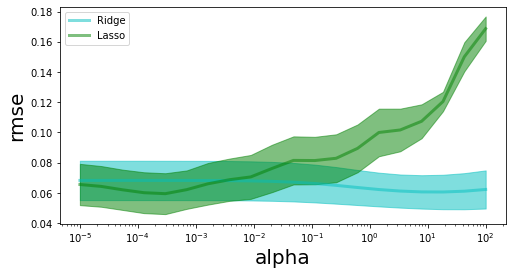

In [9]:
cv = 5 #number of folds in cross-validation

alphas = np.logspace(-5,2,20)
scores = np.zeros((len(alphas),cv))
scores_mu = np.zeros(len(alphas))
scores_sigma = np.zeros(len(alphas))

for i in range(0,len(alphas)):
    model = Ridge(alpha=alphas[i])
    scores[i,:] = sqrt(-cross_val_score(model, train, target,scoring="neg_mean_squared_error", cv = cv))
    scores_mu[i] = mean(scores[i,:])
    scores_sigma[i] = std(scores[i,:])

figure(figsize(8,4))   
#for i in range(0,cv):
#    plot(alphas,scores[:,i], 'b--', alpha=0.5)
plot(alphas,scores_mu,'c-',lw=3, alpha=0.5, label = "Ridge")
fill_between(alphas,np.array(scores_mu)-np.array(scores_sigma),
             np.array(scores_mu)+np.array(scores_sigma),color="c",alpha=0.5)

print("best score in Ridge: ",min(scores_mu))

for i in range(0,len(alphas)):
    model = Lasso(alpha=alphas[i])
    scores[i,:] = sqrt(-cross_val_score(model, train, target,scoring="neg_mean_squared_error", cv = cv))
    scores_mu[i] = mean(scores[i,:])
    scores_sigma[i] = std(scores[i,:])

plot(alphas,scores_mu,'g-',lw=3, alpha=0.5, label="Lasso")
fill_between(alphas,np.array(scores_mu)-np.array(scores_sigma),
             np.array(scores_mu)+np.array(scores_sigma),color="g",alpha=0.5)

xscale("log")
plt.xlabel("alpha", size=20)
plt.ylabel("rmse", size=20)
legend(loc=2)

print("best score in Lasso: ",min(scores_mu))

In [ ]:
# It looks like Lasso regression performs slightly better at around alpha=1e-4. I will prepare a submit file and there where I end up:

In [10]:
model = Lasso(alpha=1e-4)
model.fit(train,target)
preds = model.predict(test)
preds = 10**preds

In [11]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("submit.csv", index = False)